# Libraries and Global Settings

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from pyearth import Earth

In [2]:
sns.set(style = "darkgrid")

fig_path = '../Figures/'

# Read and Clean Data

In [3]:
data = pd.read_csv('myst_ai_load_exercise.csv')

In [4]:
data.rename(columns = {'Unnamed: 0':'datetime'}, inplace = True)
data['datetime'] = pd.to_datetime(data['datetime'], format = '%Y-%m-%d %H:%M:%S')

## Change index

In [5]:
data = data.set_index('datetime', drop = False)
del data.index.name

## Add variables

In [6]:
data = data.assign(date = data.index.date)
data = data.assign(hour = data.index.hour)
data = data.assign(weekday_name = data.index.weekday_name)
data = data.assign(weekday = data.index.weekday)
print data.dtypes
data.head()

datetime        datetime64[ns]
load_1                 float64
load_2                 float64
temp                   float64
date                    object
hour                     int64
weekday_name            object
weekday                  int64
dtype: object


datetime     load_1      load_2       temp  \
2014-01-01 00:00:00 2014-01-01 00:00:00  39.993812  969.202417 -10.196955   
2014-01-01 01:00:00 2014-01-01 01:00:00  29.105039  906.838530 -10.236170   
2014-01-01 02:00:00 2014-01-01 02:00:00  25.763864  885.545569 -10.348187   
2014-01-01 03:00:00 2014-01-01 03:00:00  29.769310  928.338348 -10.872890   
2014-01-01 04:00:00 2014-01-01 04:00:00  39.928189  994.146629 -10.670639   

                           date  hour weekday_name  weekday  
2014-01-01 00:00:00  2014-01-01     0    Wednesday        2  
2014-01-01 01:00:00  2014-01-01     1    Wednesday        2  
2014-01-01 02:00:00  2014-01-01     2    Wednesday        2  
2014-01-01 03:00:00  2014-01-01     3    Wednesday        2  
2014-01-01 04:00:00  2014-01-01     4    Wednesday        2

# Create Train/Test Split

In [7]:
testSize = 1.0 / 3.0
validateSize = 1.0 / 3.0

testStart = int(round((1-testSize)*len(data)))
test = data.iloc[testStart:len(data)]

validateStart = int(round((1-validateSize)*testStart))
validate = data.iloc[validateStart:testStart]

train = data.iloc[0:validateStart]

print "data start: " + str(data.datetime.min())
print "train start: " + str(train.datetime.min())
print "train end: " + str(train.datetime.max())
print "validate start: " + str(validate.datetime.min())
print "validate end: " + str(validate.datetime.max())
print "test start: " + str(test.datetime.min())
print "test end: " + str(test.datetime.max())
print "data end: " + str(data.datetime.max())

data start: 2014-01-01 00:00:00
train start: 2014-01-01 00:00:00
train end: 2016-02-10 15:00:00
validate start: 2016-02-10 16:00:00
validate end: 2017-03-01 23:00:00
test start: 2017-03-02 00:00:00
test end: 2018-09-30 23:00:00
data end: 2018-09-30 23:00:00


# Exploratory Data Analysis

## Create Daily Maximum Dataset

In [8]:
load1 = train.rename(columns = {'load_1':'load'}).drop(columns=['load_2'])
load2 = train.rename(columns = {'load_2':'load'}).drop(columns=['load_1'])

dailyMax1 = load1.loc[load1.groupby(['date'])['load'].idxmax()]
dailyMax2 = load2.loc[load2.groupby(['date'])['load'].idxmax()]

## Time Series Plots

In [ ]:
f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2014-1':'2014-6'])
f1.suptitle('Load 1: 01/2014 - 06/2014')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts1.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2014-7':'2014-12'])
f1.suptitle('Load 1: 07/2014 - 12/2014')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts2.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2015-1':'2015-6'])
f1.suptitle('Load 1: 01/2015 - 06/2015')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts3.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2015-7':'2015-12'])
f1.suptitle('Load 1: 07/2015 - 12/2015')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts4.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2016-1':'2016-6'])
f1.suptitle('Load 1: 01/2016 - 02/2016')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts5.png", dpi = 300)

In [ ]:
f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2014-1':'2014-6'])
f1.suptitle('Load 2: 01/2014 - 06/2014')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts1.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2014-7':'2014-12'])
f1.suptitle('Load 2: 07/2014 - 12/2014')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts2.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2015-1':'2015-6'])
f1.suptitle('Load 2: 01/2015 - 06/2015')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts3.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2015-7':'2015-12'])
f1.suptitle('Load 2: 07/2015 - 12/2015')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts4.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2016-1':'2016-6'])
f1.suptitle('Load 2: 01/2016 - 02/2016')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts5.png", dpi = 300)

In [ ]:
start = '2015-03-25'
end = '2015-04-15'

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train[start:end])
f1.suptitle('Load 1')
f1.savefig(fig_path + 'Load_1 sample weeks.png', dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train[start:end])
f1.suptitle('Load 2')
f1.savefig(fig_path + 'Load_2 sample weeks.png', dpi = 300)

## Summer Changes

In [ ]:
f2, ax2 = plt.subplots(figsize = (14,8))
sns.lineplot(x ='datetime', y = 'load_2', data=train['2015-06-25':'2015-08-10'])
f2.suptitle('Load 2 Structure Change')
f2.savefig(fig_path + 'Load_2 Noise Big.png', dpi = 300)

In [ ]:
f2, ax2 = plt.subplots(figsize = (14,8))
sns.lineplot(x ='datetime', y = 'load_2', data=train['2015-07-01':'2015-07-14'])
f2.suptitle('Load 2 Structure Change')
f2.savefig(fig_path + "Load_2 Noise Small.png", dpi = 300)

## Violin Plots

In [ ]:
f1, ax1 = plt.subplots(figsize=(14, 8))
sns.violinplot(x=train.load_1)
f1.suptitle('Load 1 Violin Plot', fontsize=16)

f2, ax2 = plt.subplots(figsize=(14, 8))
sns.violinplot(x=train.load_2)
f2.suptitle('Load 2 Violin Plot', fontsize=16)

## Daily Max Violin Plots

In [ ]:
f1, ax1 = plt.subplots(figsize=(14, 8))
sns.violinplot(x=dailyMax1['load'])
f1.suptitle('Load 1 Daily Max Violin Plot', fontsize=16)

f2, ax2 = plt.subplots(figsize=(14, 8))
sns.violinplot(x=dailyMax2['load'])
f2.suptitle('Load 2 Daily Max Violin Plot', fontsize=16)

## Daily Max vs. Temperature

In [ ]:
f1, ax1 = plt.subplots(figsize=(14, 8))
sns.scatterplot(data = dailyMax1, x = 'temp', y = 'load')
f1.suptitle('Load 1 Daily Max vs. Temperature')
f1.savefig(fig_path + "Load_1 Daily Max vs Temp.png", dpi=300)

f2, ax2 = plt.subplots(figsize=(14, 8))
sns.scatterplot(data = dailyMax2, x = 'temp', y = 'load')
f2.suptitle('Load 2 Daily Max vs. Temperature')

## Facet Plots

In [9]:
def quarter_days(x):
    if x<6:
        return '00:00 - 06:00'
    elif x<12:
        return '06:00 - 12:00'
    elif x<18:
        return '12:00 - 18:00'
    else:
        return '18:00 - 00:00'
    
def adjust_hours(x):
    if x in [0, 6, 12, 18]:
        return 'zero'
    elif x in [1, 7, 13, 19]:
        return 'one'
    elif x in [2, 8, 14, 20]:
        return 'two'
    elif x in [3, 9, 15, 21]:
        return 'three'
    elif x in [4, 10, 16, 22]:
        return 'four'
    else:
        return 'five'

In [10]:
load1_temp = load1.assign(quarter = load1.hour.apply(quarter_days))
load2_temp = load2.assign(quarter = load2.hour.apply(quarter_days))

load1_temp = load1_temp.assign(hour = load1_temp.hour.apply(adjust_hours))
load2_temp = load2_temp.assign(hour = load2_temp.hour.apply(adjust_hours))

Text(0.5,0.98,'Load 1 Facets')

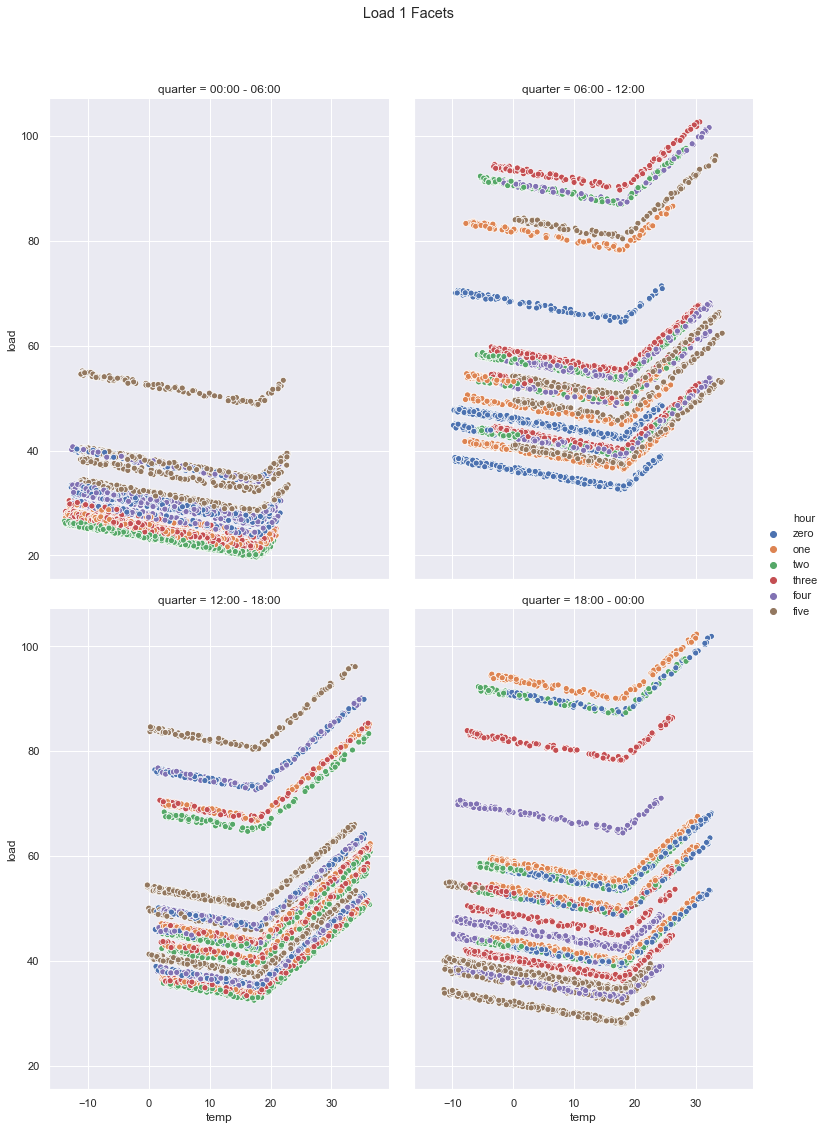

In [11]:
g = sns.relplot(data=load1_temp, x="temp", y="load", hue='hour', col='quarter', \
                  col_wrap = 2, height=8, aspect = 0.67)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Load 1 Facets')

Text(0.5,0.98,'Load 1 Facets')

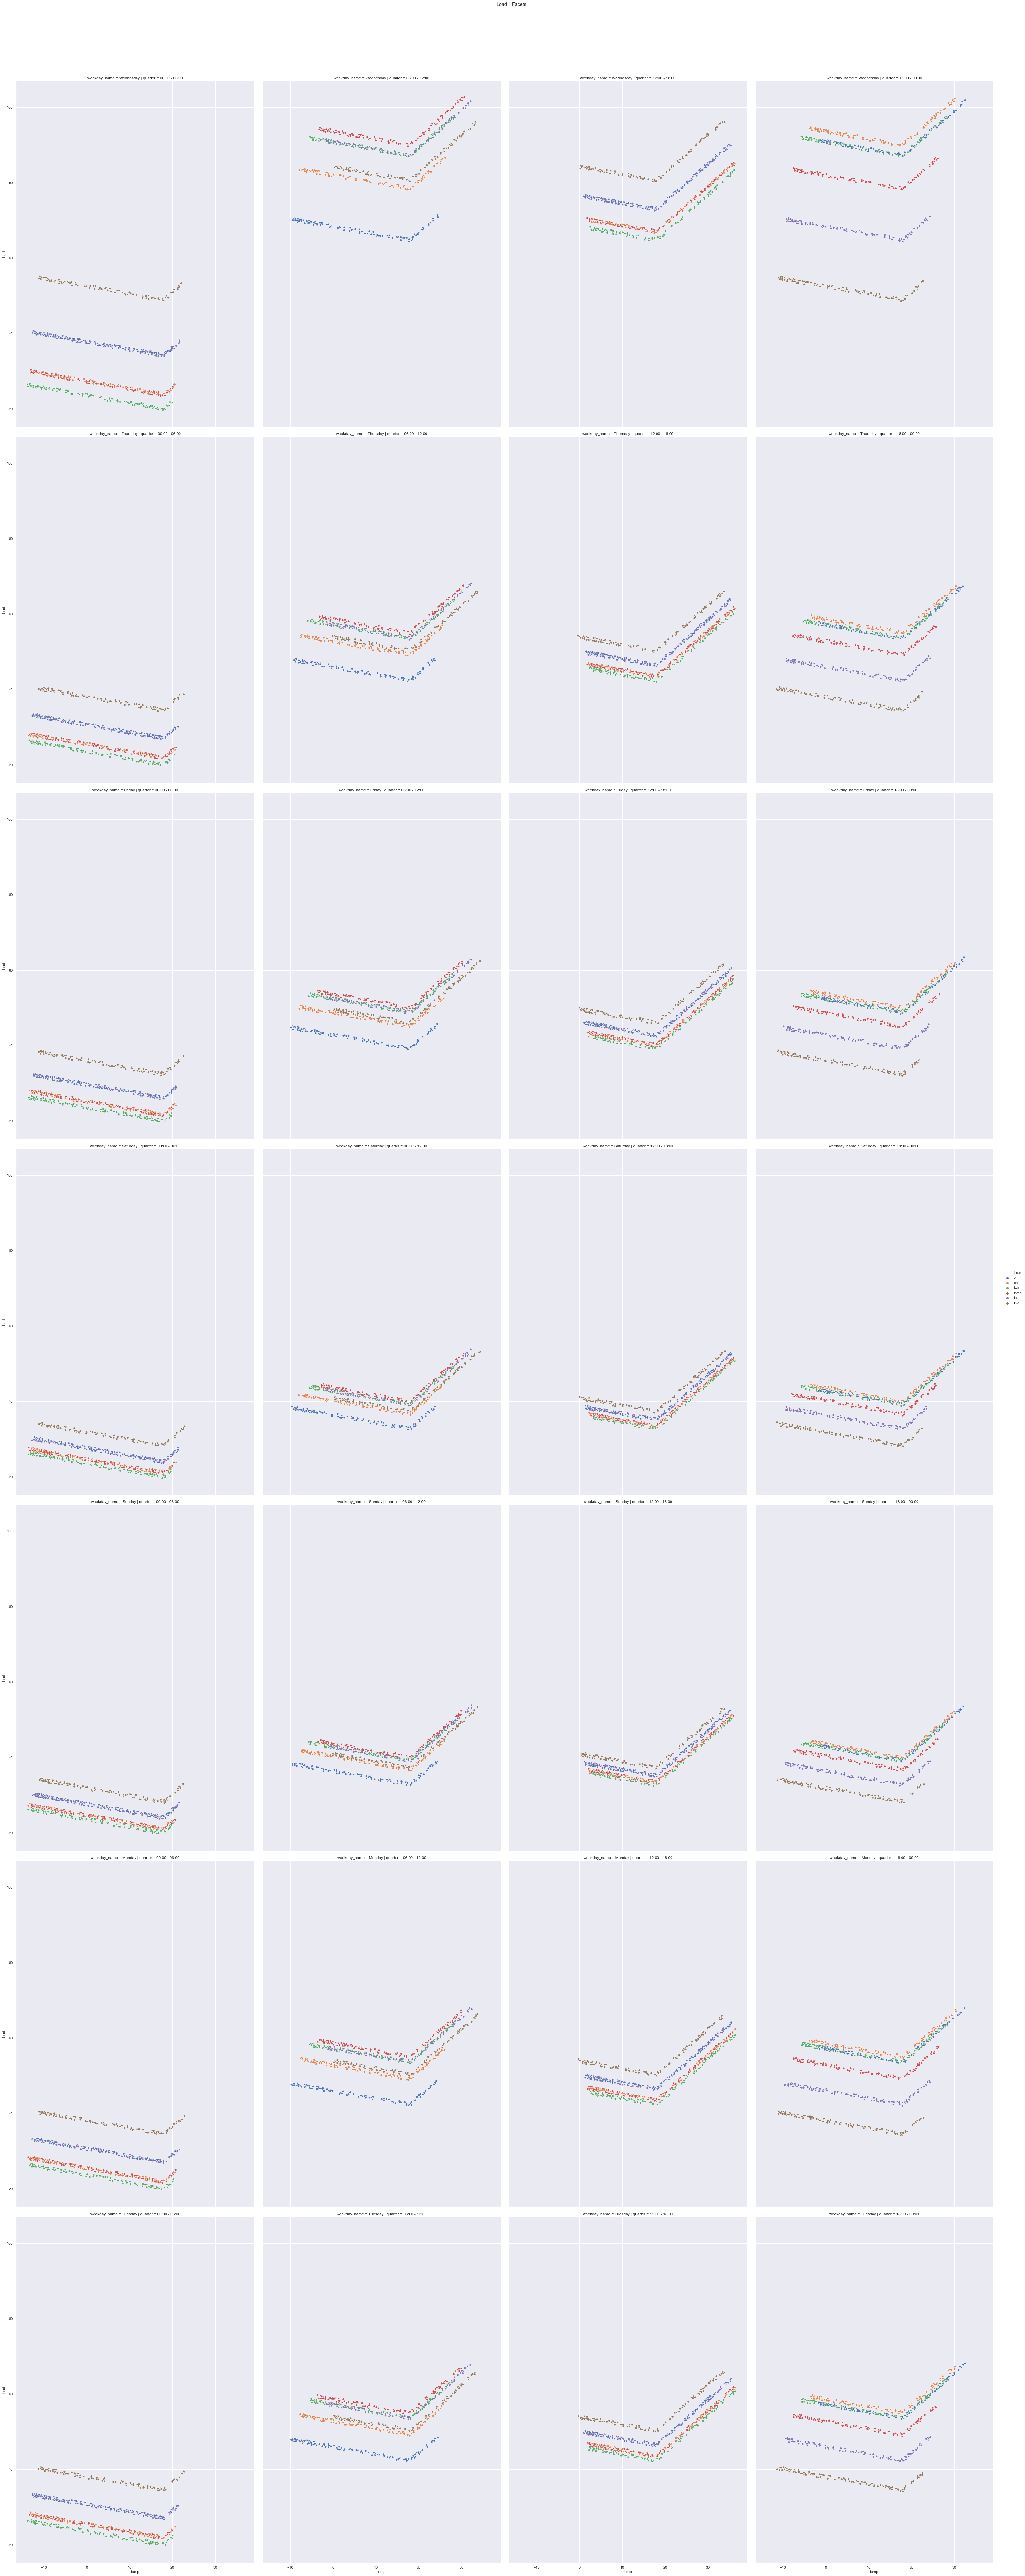

In [12]:
g = sns.relplot(data=load1_temp, x="temp", y="load", hue='hour', row = 'weekday_name', \
                col='quarter', height=16, aspect = 0.67)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Load 1 Facets')

In [13]:
g = sns.relplot(data=load2_temp['2014-08-10':'2015-06-25'], x="temp", y="load", hue='hour', col='quarter', \
                  col_wrap = 2, height=8, aspect = 0.67)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Load 2 Facets')

Text(0.5,0.98,'Load 2 Facets')

Text(0.5,0.98,'Load 2 Facets')

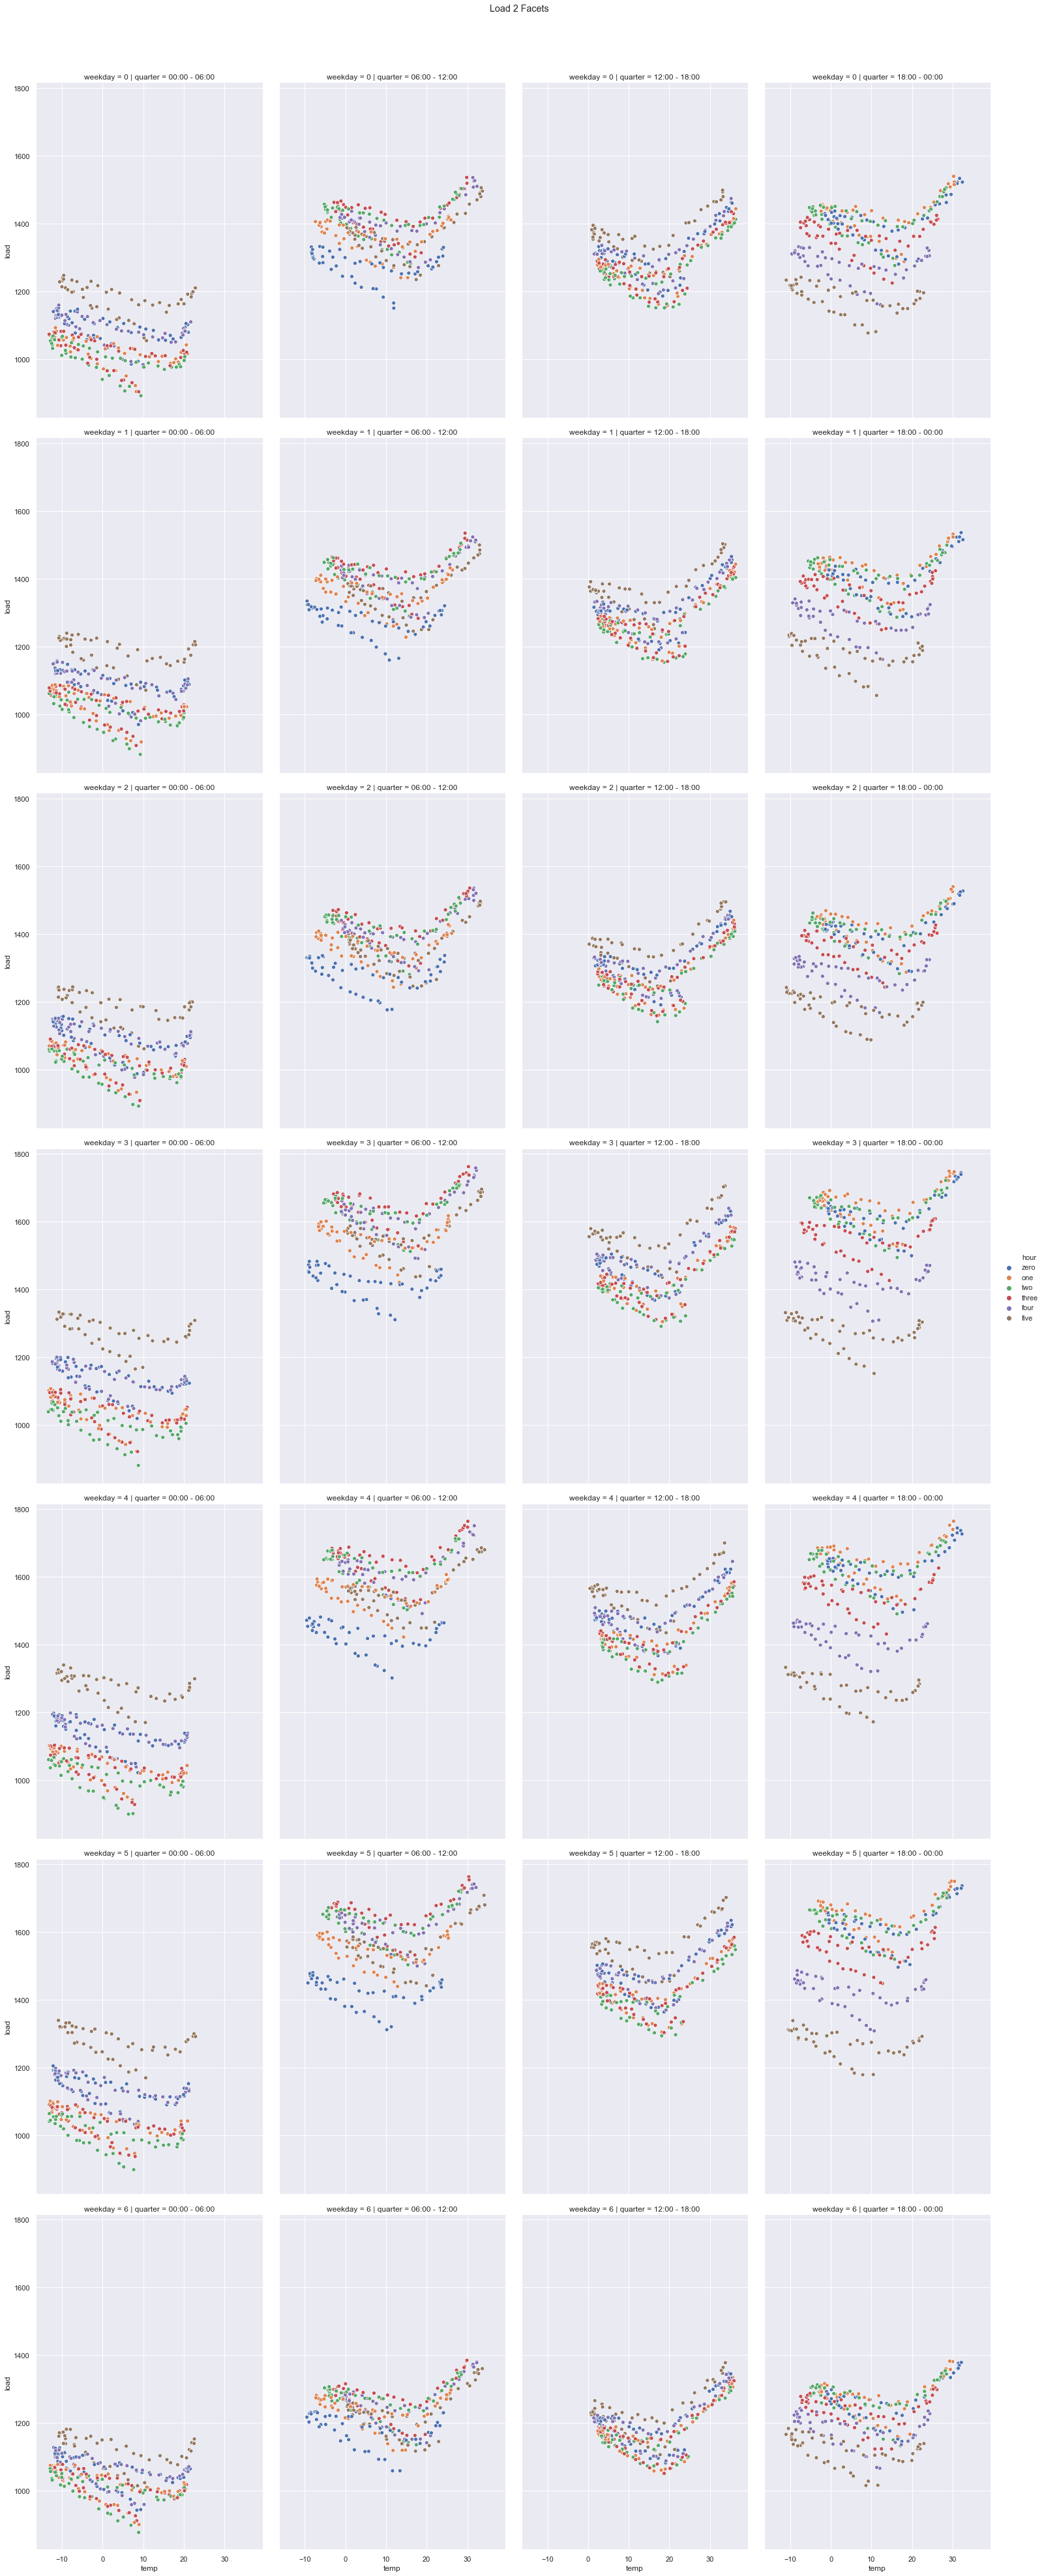

In [14]:
g = sns.relplot(data=load2_temp['2014-08-10':'2015-06-25'], x="temp", y="load", hue='hour', row = 'weekday', \
                col='quarter', height=8, aspect = 0.67)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Load 2 Facets')

Text(0.5,0.98,'Load 1')

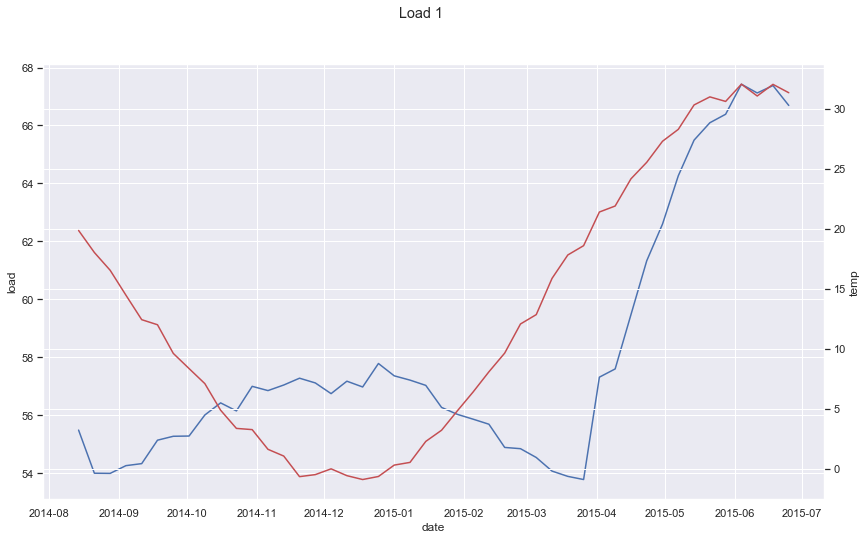

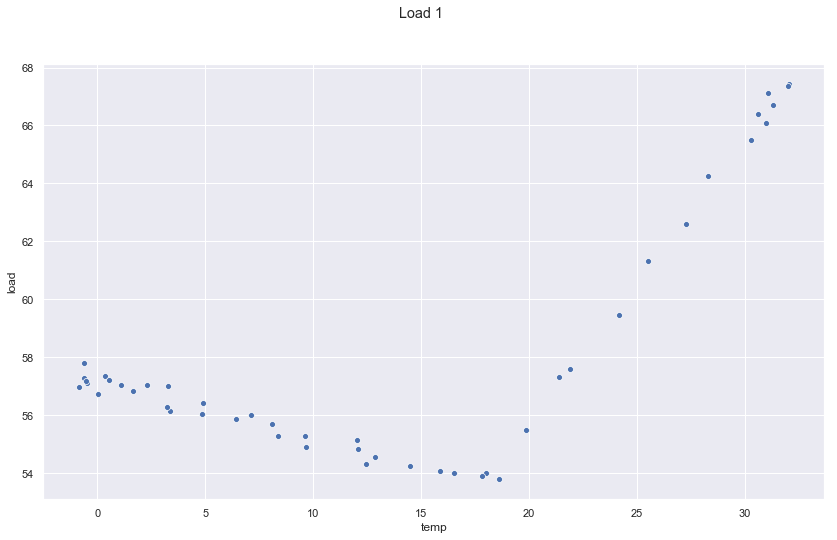

In [15]:
f1, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()
sns.lineplot(data = load1[(load1['weekday'] == 3) & (load1['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'date', y = 'load', ax=ax1)
sns.lineplot(data = load1[(load1['weekday'] == 3) & (load1['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'date', y = 'temp', ax=ax2, color='r')
f1.suptitle('Load 1')

f1, ax1 = plt.subplots(figsize=(14, 8))
sns.scatterplot(data = load1[(load1['weekday'] == 3) & (load1['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'temp', y = 'load')
f1.suptitle('Load 1')

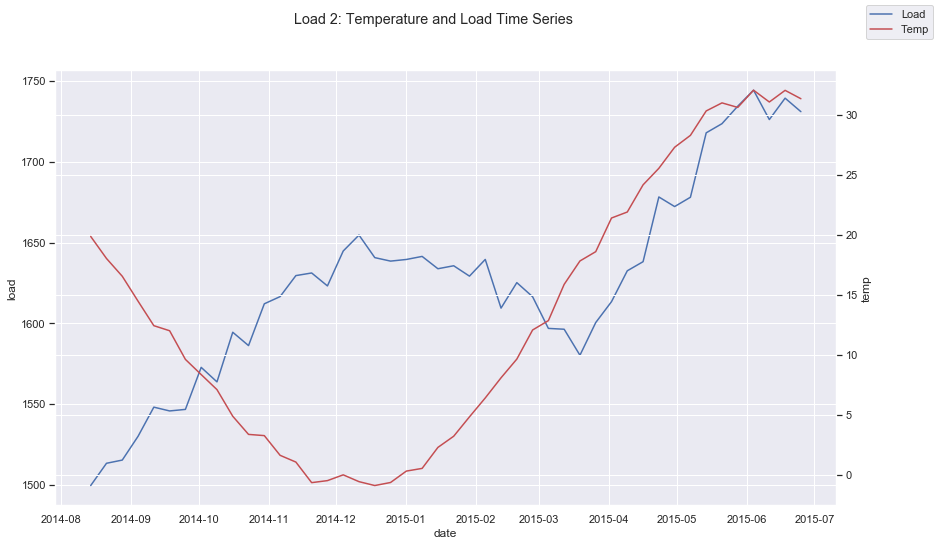

In [16]:
f1, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()
sns.lineplot(data = load2[(load2['weekday'] == 3) & (load2['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'date', y = 'load', ax=ax1, label='Load', legend=False)
sns.lineplot(data = load2[(load2['weekday'] == 3) & (load2['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'date', y = 'temp', ax=ax2, color='r', label='Temp', legend=False)
f1.legend()
f1.suptitle('Load 2: Temperature and Load Time Series')
f1.savefig(fig_path + "Load_2 load_temp ts.png", dpi = 300)

## K-means Clustering

In [17]:
load1_days = load1[['date', 'load']]
load1_days = load1_days.assign(hour = load1_days.index.hour)
load1_days = load1_days.pivot(index = 'date', columns = 'hour', values = 'load')
load1_days = load1_days.dropna()

load2_days = load2[['date', 'load']]
load2_days = load2_days.assign(hour = load2_days.index.hour)
load2_days = load2_days.pivot(index = 'date', columns = 'hour', values = 'load')
load2_days = load2_days.dropna()

In [18]:
kmeans1 = KMeans(n_clusters = 4, n_init = 50, max_iter = 500).fit(load1_days)
kmeans2 = KMeans(n_clusters = 5, n_init = 50, max_iter = 500).fit(load2_days)

In [19]:
def convert_clusters(x):
    lookup = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
    return lookup[x]

Text(0.5,0.98,'Load 1 Cluster Centers')

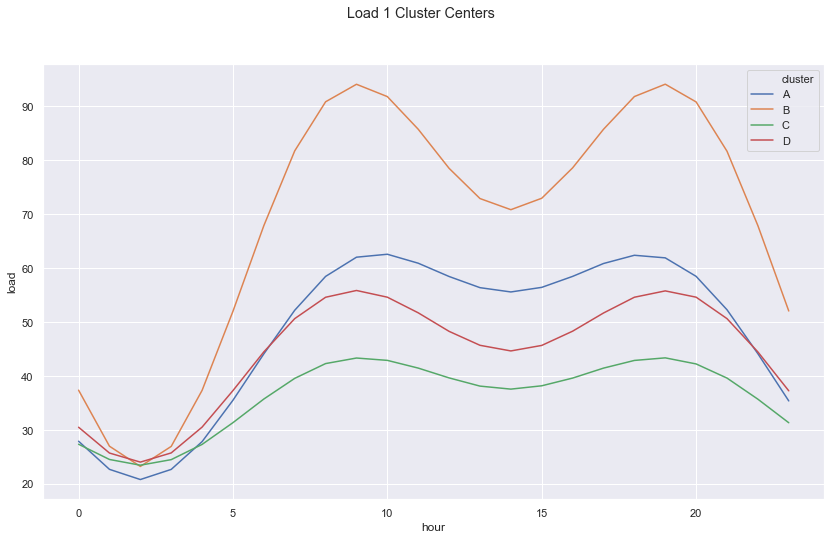

In [20]:
kmeans1_centers = pd.DataFrame(kmeans1.cluster_centers_).reset_index().rename(columns={'index':'cluster'})
kmeans1_centers = pd.melt(kmeans1_centers, id_vars = ['cluster'], value_vars = list(kmeans1_centers)[1:], \
       var_name = 'hour', value_name = 'load')
kmeans1_centers['hour'] = kmeans1_centers['hour'].astype('float')
kmeans1_centers['cluster'] = kmeans1_centers.cluster.apply(convert_clusters)
kmeans1_centers['cluster'] = kmeans1_centers.cluster.astype('category')

f1, ax1 = plt.subplots(figsize=(14, 8))
sns.lineplot(data=kmeans1_centers, x='hour', y='load', hue='cluster')
f1.suptitle('Load 1 Cluster Centers')

Text(0.5,0.98,'Load 2 Cluster Centers')

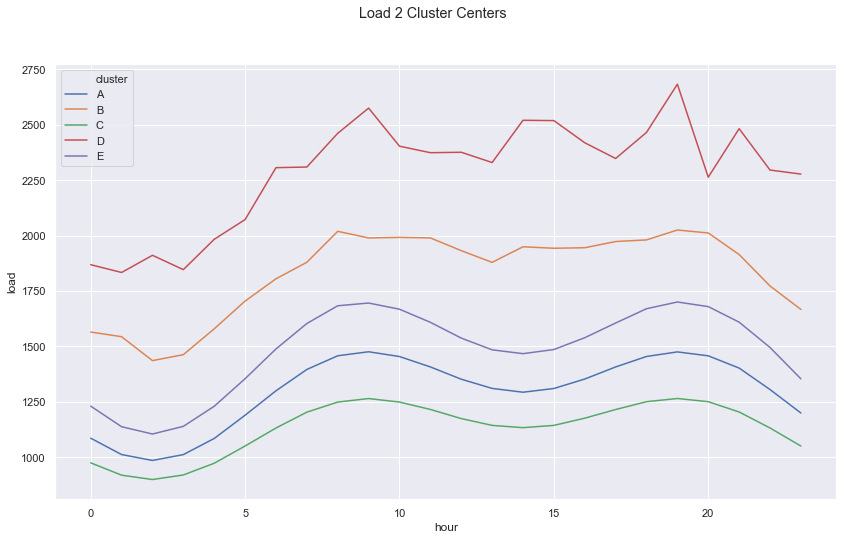

In [21]:
kmeans2_centers = pd.DataFrame(kmeans2.cluster_centers_).reset_index().rename(columns={'index':'cluster'})
kmeans2_centers = pd.melt(kmeans2_centers, id_vars = ['cluster'], value_vars = list(kmeans2_centers)[1:], \
       var_name = 'hour', value_name = 'load')
kmeans2_centers['hour'] = kmeans2_centers['hour'].astype('float')
kmeans2_centers['cluster'] = kmeans2_centers.cluster.apply(convert_clusters)
kmeans2_centers['cluster'] = kmeans2_centers.cluster.astype('category')

f1, ax1 = plt.subplots(figsize=(14, 8))
sns.lineplot(data=kmeans2_centers, x='hour', y='load', hue='cluster')
f1.suptitle('Load 2 Cluster Centers')

## Seasonal Decomposition

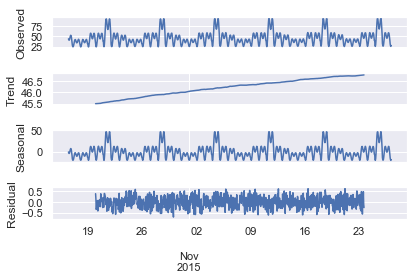

In [22]:
length = 1000
start = random.randint(0, len(train) - length)

dcdata = train['load_1'].iloc[start:(start+length)]
dcfreq = 24*7

decomp1 = seasonal_decompose(dcdata, freq = dcfreq)

decomp1.plot()

/Users/Kramer/anaconda2/lib/python2.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


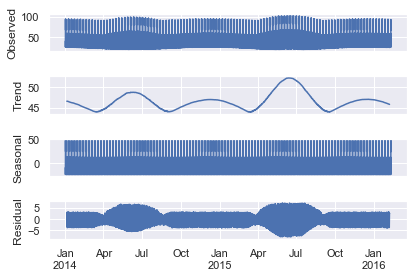

In [23]:
dcfreq = 24*7
decomp_test = seasonal_decompose(train['load_1'], freq = dcfreq)

decomp_test.plot()

# Additional Plots for Presentation

[(15, 105)]

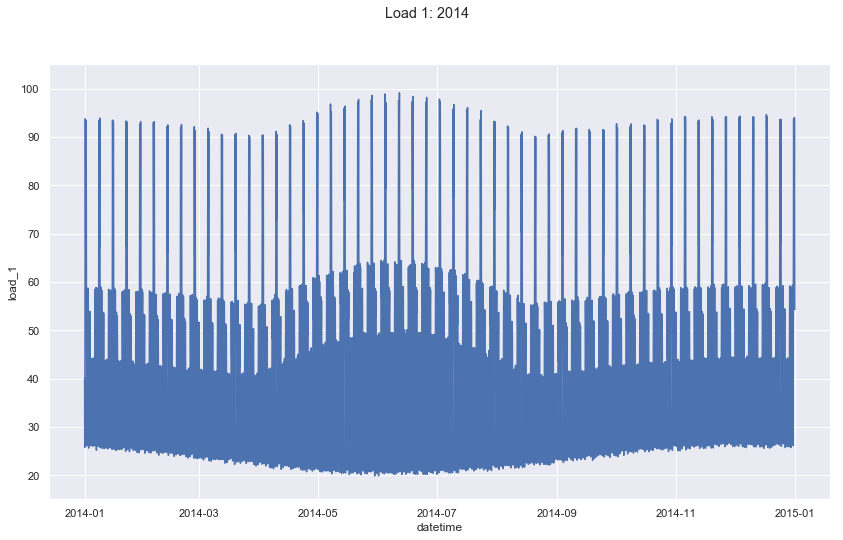

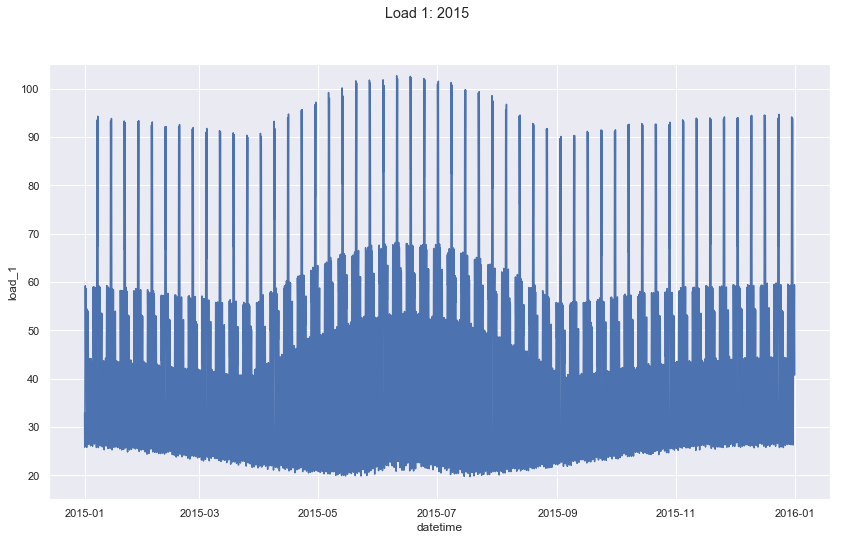

In [37]:
f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2014-1':'2014-12'])
f1.suptitle('Load 1: 2014')
ax1.set(ylim = (15, 105))

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2015-1':'2015-12'])
f1.suptitle('Load 1: 2015')
ax1.set(ylim = (15, 105))

In [ ]:
f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2014-1':'2014-12'])
f1.suptitle('Load 2: 2014')
ax1.set(ylim = (800, 3800))

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2015-1':'2015-12'])
f1.suptitle('Load 2: 2015')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_1 ts 2015.png", dpi=300)

In [ ]:
f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = train['2014-1':'2014-12'])
f1.suptitle('Load 1: 2014')
ax1.set(ylim = (15, 105))
f1.savefig(fig_path + "Load_1 ts 2014.png", dpi = 300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = train['2014-1':'2014-12'])
f1.suptitle('Load 2: 2014')
ax1.set(ylim = (800, 3800))
f1.savefig(fig_path + "Load_2 ts 2014.png", dpi = 300)

In [ ]:
facet_data = load1_temp[(load1_temp.weekday_name == 'Wednesday') & (load1_temp.quarter == "06:00 - 12:00")]
f1, ax1 = plt.subplots(figsize = (8, 8))
sns.scatterplot(data=facet_data, x="temp", y="load", hue="hour")
f1.suptitle('Load 1: Wednesdays 06:00-12:00')
f1.savefig(fig_path + "Load_1 Wed Mid-Morning.png", dpi=300)

facet_data = load1_temp[(load1_temp.weekday_name == 'Sunday') & (load1_temp.quarter == "18:00 - 00:00")]
f1, ax1 = plt.subplots(figsize = (8, 8))
sns.scatterplot(data=facet_data, x="temp", y="load", hue="hour")
f1.suptitle('Load 1: Sundays 18:00-00:00')
f1.savefig(fig_path + "Load_1 Sunday Evening.png", dpi=300)

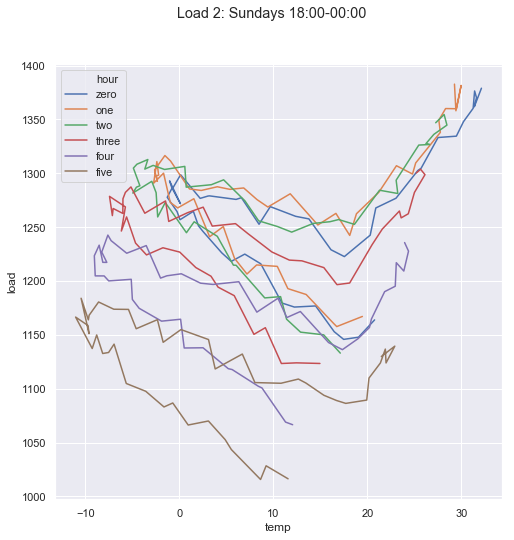

In [38]:
facet_data = load2_temp[(load2_temp.weekday_name == 'Wednesday') & (load2_temp.quarter == "06:00 - 12:00")]
facet_data = facet_data['2014-08-10':'2015-06-25']
f1, ax1 = plt.subplots(figsize = (8, 8))
sns.lineplot(data=facet_data, x="temp", y="load", hue="hour", sort=False)
# sns.scatterplot(data=facet_data, x="temp", y="load", hue="hour")
f1.suptitle('Load 2: Wednesdays 06:00-12:00')
f1.savefig(fig_path + "Load_2 Wed Mid-Morning.png", dpi=300)

facet_data = load2_temp[(load2_temp.weekday_name == 'Sunday') & (load2_temp.quarter == "18:00 - 00:00")]
facet_data = facet_data['2014-08-10':'2015-06-25']
f1, ax1 = plt.subplots(figsize = (8, 8))
sns.lineplot(data=facet_data, x="temp", y="load", hue="hour", sort=False)
# sns.scatterplot(data=facet_data, x="temp", y="load", hue="hour")
f1.suptitle('Load 2: Sundays 18:00-00:00')
f1.savefig(fig_path + "Load_2 Sunday Evening.png", dpi=300)

In [39]:
f1, ax1 = plt.subplots(figsize=(14, 8))
sns.lineplot(data = load2[(load2['weekday_name'] == 'Wednesday') & (load2['hour'] == 18)]['2014-08-10':'2015-06-25'], \
                x = 'temp', y = 'load', sort=False)
f1.suptitle('Load 2: Wednesdays 6pm, 08/10/2014 - 06/25/2015')
f1.savefig(fig_path + "Load_2 load vs temp Wed 6pm.png", dpi = 300)

# Additional Work

# Prediction Model Evaluation

## Spline regression 

In [24]:
def regression_splines(train, predict):
    
    load1_mods = fit_models(train, 'load_1')
    load2_mods = fit_models(train, 'load_2')
    
    result = predict_splines_grid(predict, load1_mods, 'load1_pred')
    result = predict_splines_grid(result, load2_mods, 'load2_pred')
    
    return result

def fit_models(df, load_num):
    
    result = []
    
    for i in range(0,7):

        curr_models = []

        for j in range(0,24):
            curr_data = df[(df.weekday == i) & (df.hour == j)]
            curr_X = curr_data.temp
            curr_y = curr_data[load_num]

            curr_mod = Earth()
            curr_mod.fit(curr_X, curr_y)

            curr_models.append(curr_mod)

        result.append(curr_models)
        
    return result



def predict_splines_grid(df, mod_array, col_name):
    
    result = pd.DataFrame()

    for i in range(0,7):
        for j in range(0,24):

            curr_data = df[(df.weekday == i) & (df.hour == j)]
            curr_X = curr_data.temp

            curr_mod = mod_array[i][j]

            curr_data = curr_data.assign(curr_pred = curr_mod.predict(curr_X))
            
            curr_data = curr_data.rename(columns = {'curr_pred':col_name})
        
            result = pd.concat([result, curr_data])
                
    return result


def MAPE(actual, pred):
        return sum(abs((actual - pred) / pred)) * 100 / len(actual)


In [25]:
rsplines_validate = regression_splines(train, validate)

/Users/Kramer/anaconda2/lib/python2.7/site-packages/sklearn_contrib_py_earth-0.1.0-py2.7-macosx-10.6-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/Kramer/anaconda2/lib/python2.7/site-packages/sklearn_contrib_py_earth-0.1.0-py2.7-macosx-10.6-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [26]:
load1_val_MAPE = MAPE(rsplines_validate.load_1, rsplines_validate.load1_pred)
load2_val_MAPE = MAPE(rsplines_validate.load_2, rsplines_validate.load2_pred)

print load1_val_MAPE
print load2_val_MAPE

0.670860827335
12.4408662553


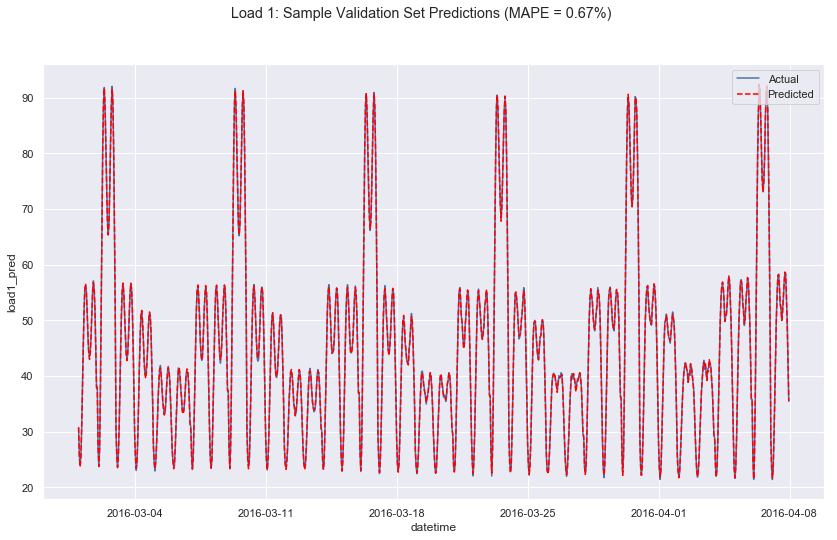

In [27]:
start = '2016-3-01'
end = '2016-04-07'

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = rsplines_validate[start:end], label='Actual')
sns.lineplot(x = 'datetime', y = 'load1_pred', data = rsplines_validate[start:end], color = 'red', label='Predicted')
ax1.lines[1].set_linestyle("--")
ax1.legend(loc=1)
f1.suptitle('Load 1: Sample Validation Set Predictions (MAPE = ' + str(round(load1_val_MAPE,2)) + "%)")
f1.savefig(fig_path + 'Load_1 validation sample.png', dpi=300)

In [28]:
start = '2016-3-01'
end = '2016-04-07'

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = rsplines_validate[start:end], label='Actual')
sns.lineplot(x = 'datetime', y = 'load2_pred', data = rsplines_validate[start:end], color = 'red', label='Predicted')
# ax1.lines[1].set_linestyle("--")
ax1.legend(loc=1)
f1.suptitle('Load 2: Sample Validation Set Predictions (MAPE = ' + str(round(load2_val_MAPE,2)) + "%)")
f1.savefig(fig_path + 'Load_2 validation sample.png', dpi=300)

## Multivariate Adaptive Regression Splines - py-earth

This was the best package I could find for a MARS implementation, but unfortunately it does not support categorical predictors, so it couldn't be used to generate an accurate forecast in this case

In [29]:
# X = train[['temp', 'hour', 'weekday']]
# y = train['load_1']

# model = Earth()
# model.fit(X,y)

In [30]:
# print model.trace()
# print model.summary()

In [31]:
# model_test = load1.assign(pred = model.predict(X))

# f1, ax1 = plt.subplots(figsize=(14, 8))
# sns.lineplot(data = model_test['2014-01-01':'2014-01-21'], x = 'datetime', y = 'load')
# sns.lineplot(data = model_test['2014-01-01':'2014-01-21'], x = 'datetime', y = 'pred', color='r')
# f1.suptitle('Load 1')

# Test Set Predictions

## Training Set & Test Set

In [32]:
train_full = pd.concat([train, validate])

In [33]:
rsplines_test = regression_splines(train_full, test)

In [34]:
rs_test_MAPE1 = MAPE(rsplines_test.load_1, rsplines_test.load1_pred)
rs_test_MAPE2 = MAPE(rsplines_test.load_2, rsplines_test.load2_pred)

print rs_test_MAPE1
print rs_test_MAPE2

0.601529978265
35.7543865146


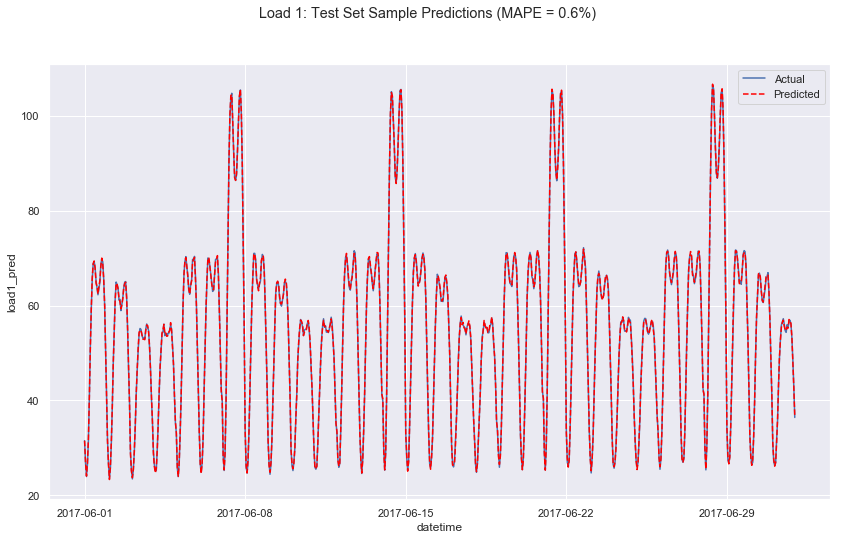

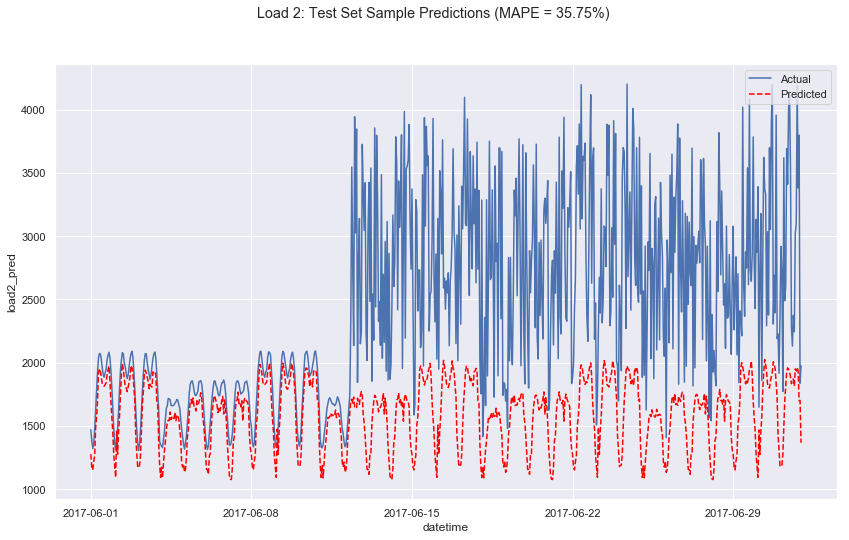

In [35]:
start = '2017-06-01'
end = '2017-07-01'

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = rsplines_test[start:end], label='Actual')
sns.lineplot(x = 'datetime', y = 'load1_pred', data = rsplines_test[start:end], color = 'red', label='Predicted')
ax1.lines[1].set_linestyle("--")
ax1.legend(loc=1)
f1.suptitle('Load 1: Test Set Sample Predictions (MAPE = ' + str(round(rs_test_MAPE1,2)) + "%)")
f1.savefig(fig_path + 'Load_1 Test_set sample.png', dpi=300)

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_2', data = rsplines_test[start:end], label='Actual')
sns.lineplot(x = 'datetime', y = 'load2_pred', data = rsplines_test[start:end], color = 'red', label='Predicted')
ax1.lines[1].set_linestyle("--")
ax1.legend(loc=1)
f1.suptitle('Load 2: Test Set Sample Predictions (MAPE = ' + str(round(rs_test_MAPE2,2)) + "%)")
f1.savefig(fig_path + 'Load_2 Test_set sample.png', dpi=300)

## Rolling Day-Ahead Predictions

Note: This code may not be functional

In [ ]:
def day_ahead(df, start_date):
    
    # Pull out data for which predictions should be generated
    pred_data = df[start_date:]
    
    # Series for storing results
    load1_preds = pd.Series()
    load2_preds = pd.Series()
    
    curr_data = pd.DataFrame()
    curr_date = None
    
    # Iterate through observations
    for index, row in pred_data.iterrows():
        
        # Select appropriate data before that observation
        if row.date != curr_date:
            curr_data = df[df.date < row.date]
            curr_date = row.date
        
        train_data = curr_data[(curr_data.hour == row.hour) & (curr_data.weekday == row.weekday)]
        
        # Generate prediction for current observation
        load1, load2 = make_preds(train_data, row)
        
        # Add predictions to series
        load1_preds = load1_preds.append(pd.Series([load1]))
        load2_preds = load2_preds.append(pd.Series([load2]))
    
    # Change prediction indices
    load1_preds.index = pred_data.index
    load2_preds.index = pred_data.index
    
    # Attach predictions to data frame
    result = pred_data.assign(load1_pred = load1_preds)
    result = result.assign(load2_pred = load2_preds)
    
    return result

In [36]:
day_ahead_test = day_ahead(data, '2018-09-01')
# day_ahead_test = day_ahead_window(data, datetime.timedelta(days=21), '2018-09-20')

NameError: name 'day_ahead' is not defined

In [ ]:
rolling_MAPE1 = MAPE(day_ahead_test.load_1, day_ahead_test.load1_pred)
rolling_MAPE2 = MAPE(day_ahead_test.load_2, day_ahead_test.load2_pred)

print rolling_MAPE1
print rolling_MAPE2

In [ ]:
def day_ahead_window(df, window_size, start_date):
    
    # Pull out data for which predictions should be generated
    pred_data = df[start_date:]
    
    # Initialize Results Data Frame
    result = pd.DataFrame()
    
    # Store data in the cutoff window
    stored_data = None
    stored_cutoff = datetime.date(1000, 1, 1)
    
    i = 0
    
    # Iterate through observations
    for index, row in pred_data.iterrows():
        
        print i

        # Calculate datetime of current row
        curr_date = datetime.datetime.strptime(str(row.datetime), '%Y-%m-%d %H:%M:%S')
        
        # Check if current row is more than 1 week ahead of stored data
        if (curr_date.date() - stored_cutoff) > datetime.timedelta(weeks=1):
            
            # Update stored data
            stored_data = update_window(df, curr_date, window_size)
    
            # Update cutoff date
            stored_cutoff = curr_date.date()
            
            # Train models
            load1_mods = fit_models(stored_data, 'load_1')
            load2_mods = fit_models(stored_data, 'load_2')
            
            # Make predictions
            l1, l2 = make_preds(pred_data.loc[[index]], load1_mods, load2_mods)
            
            # Add predictions to row
            curr_pred = pred_data.loc[[index]]
            curr_pred = curr_pred.assign(load1_pred = l1)
            curr_pred = curr_pred.assign(load2_pred = l2)     
        
        # Concatenate results
        result = pd.concat([result, curr_pred])
        
        if i==5:
            print result
            print blabla
        
        i += 1
        
    return result


def make_preds(row, load1_mods, load2_mods):
    
    # Pull x and y data
    X = row.temp
    y1 = row.load_1
    y2 = row.load_2
    
    # Make predictions
    mod1 = load1_mods[row.weekday.item()][row.hour.item()]
    l1 = mod1.predict(row.temp)
    
    mod2 = load2_mods[row.weekday.item()][row.hour.item()]
    l2 = mod2.predict(row.temp)
    
    return float(l1), float(l2)


def update_window(df, date, window_size):

    # Get weekday number of current date
    wday = date.weekday()
    
    # Find date of previous Sunday
    sun = date - datetime.timedelta(days = wday)
    sun = sun.date()
    
    # Subtract window_size
    start = sun - window_size
    
    # Slice data
    result = df[(df.date >= start) & (df.date <= sun)]
    
    return result





In [ ]:
# def day_ahead_window(df, window_size, start_date):
    
#     # Pull out data for which predictions should be generated
#     pred_data = df[start_date:]
    
#     # Series for storing results
#     load1_preds = pd.Series()
#     load2_preds = pd.Series()
    
#     # Iterate through observations
#     for index, row in pred_data.iterrows():

#         # Calculate datetime of current row
#         curr_date = datetime.datetime.strptime(str(row.datetime), '%Y-%m-%d %H:%M:%S')
    
#         # Calculate cut-off datetime for moving window
#         cutoff =  curr_date - window_size
        
#         # Get data between cutoff date and 24 hours before current row
#         train_data = df[(df.datetime >= cutoff) & (df.datetime < curr_date)]
        
#         # Generate prediction for current observation
#         load1, load2 = make_preds(train_data, row)
        
#         # Add predictions to series
#         load1_preds = load1_preds.append(pd.Series([load1]))
#         load2_preds = load2_preds.append(pd.Series([load2]))
    
#     # Change prediction indices
#     load1_preds.index = pred_data.index
#     load2_preds.index = pred_data.index
    
#     # Attach predictions to data frame
#     result = pred_data.assign(load1_pred = load1_preds)
#     result = result.assign(load2_pred = load2_preds)
    
#     return result

In [ ]:
window_validate = day_ahead_window(validate, datetime.timedelta(days=28), '2016-03-01')

In [ ]:
da1_eval_MAPE = MAPE(window_validate.load_1, window_validate.load1_pred)
print da1_eval_MAPE

da2_eval_MAPE = MAPE(window_validate.load_2, window_validate.load2_pred)
print da2_eval_MAPE

In [ ]:
start = '2016-3-01'
end = '2016-04-07'

f1, ax1 = plt.subplots(figsize = (14,8))
sns.lineplot(x = 'datetime', y = 'load_1', data = window_validate[start:end], label='Actual')
sns.lineplot(x = 'datetime', y = 'load1_pred', data = window_validate[start:end], color = 'red', label='Predicted')
ax1.lines[1].set_linestyle("--")
ax1.legend(loc=1)
f1.suptitle('Load 1: Sample Sliding-Window Predictions (MAPE = ' + str(round(load1_val_MAPE,2)) + "%)")
# f1.savefig(fig_path + 'Load_1 validation sample.png', dpi=300)